In [5]:
import numpy as np
import pandas as pd

models = ["GPT2","GPT-Neo","T5","BART","DistilGPT2"]

# these are perplexity,time,size,memory values for each model
data = np.array([
    [35,120,500,3.2],
    [28,240,1300,6.5],
    [30,180,850,4.5],
    [27,200,1600,5.8],
    [40,70,300,2.1]
])

weights = np.array([0.4,0.2,0.2,0.2])

# all are cost criteria (lower better)
criteria = np.array([0,0,0,0])

# Normalize
norm = data / np.sqrt((data**2).sum(axis=0))

# Weighted matrix
weighted = norm * weights

# Ideal best/worst
ideal_best = weighted.min(axis=0)
ideal_worst = weighted.max(axis=0)

# Distances
d_best = np.sqrt(((weighted-ideal_best)**2).sum(axis=1))
d_worst = np.sqrt(((weighted-ideal_worst)**2).sum(axis=1))

# Score
score = d_worst/(d_best+d_worst)

result = pd.DataFrame({
    "Model":models,
    "TOPSIS Score":score
}).sort_values(by="TOPSIS Score",ascending=False)

print(result)

        Model  TOPSIS Score
4  DistilGPT2      0.697543
0        GPT2      0.696224
2          T5      0.526029
3        BART      0.337649
1     GPT-Neo      0.323040


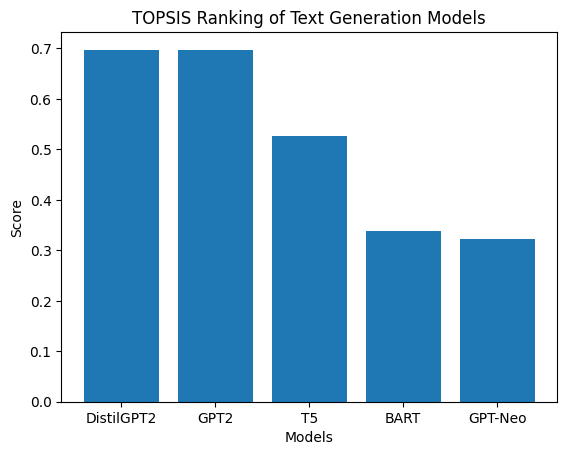

In [6]:
import matplotlib.pyplot as plt

plt.bar(result["Model"], result["TOPSIS Score"])
plt.title("TOPSIS Ranking of Text Generation Models")
plt.xlabel("Models")
plt.ylabel("Score")
plt.show()